<a href="https://colab.research.google.com/github/octkartiktiwari-bit/investing_pricechart/blob/main/invest_pricechart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipython-input-1339409280.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  qqq = yf.download(


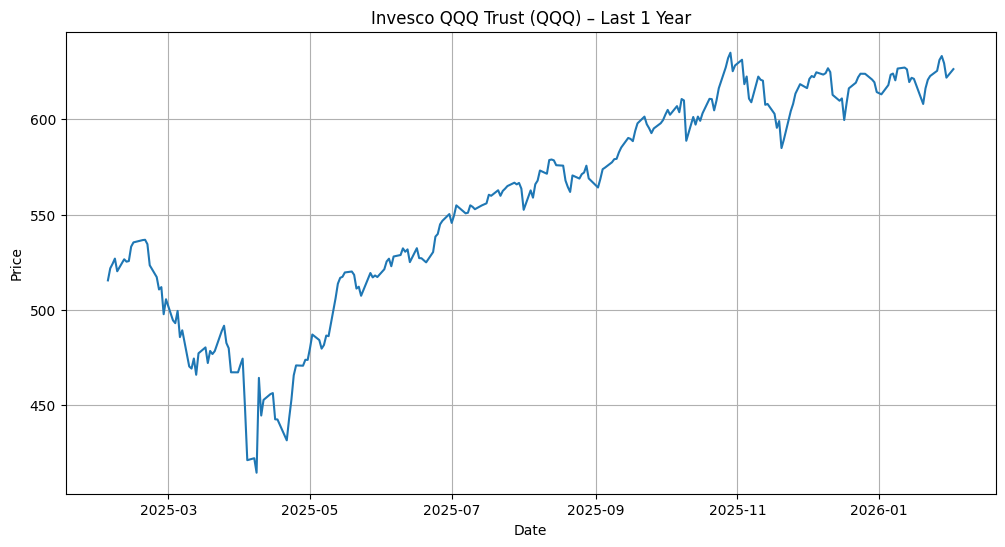

In [3]:
# Download last 1 year of QQQ data
qqq = yf.download(
    "QQQ",
    period="1y",
    interval="1d",
    progress=False
)

# Plot
plt.figure(figsize=(12,6))
plt.plot(qqq.index, qqq["Close"])
plt.title("Invesco QQQ Trust (QQQ) – Last 1 Year")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [6]:
import yfinance as yf
import pandas as pd

# =========================
# USER VARIABLES
# =========================
INITIAL_CAPITAL = 10000
PROFIT_STEP = 10
REENTRY_GAP = 5

# Trading window
START_TRADE_DATE = pd.Timestamp("2026-01-21")
END_TRADE_DATE   = pd.Timestamp("2026-01-30")

# =========================
# LOAD DATA
# =========================
data = yf.download("QQQ", start="2026-01-01", end="2026-02-05", progress=False)
data = data.dropna()

# =========================
# STATE VARIABLES
# =========================
capital = INITIAL_CAPITAL
position_qty = 0
buy_price = None
last_sell_price = None

trades = []

# =========================
# TRADING ENGINE
# =========================
for date, row in data.iterrows():

    # ---- DATE FILTER (CRITICAL CHANGE) ----
    if date < START_TRADE_DATE or date > END_TRADE_DATE:
        continue

    price = float(row["Close"])

    # -------- FIRST BUY --------
    if position_qty == 0 and buy_price is None:
        position_qty = capital / price
        buy_price = price
        trades.append([date, "BUY_1", price, capital])
        continue

    # -------- PROFIT SELL --------
    if position_qty > 0 and price >= buy_price + PROFIT_STEP:
        capital = position_qty * price
        last_sell_price = price
        position_qty = 0
        buy_price = None
        trades.append([date, "SELL_PROFIT", price, capital])
        continue

    # -------- RE-ENTRY LOGIC --------
    if position_qty == 0 and last_sell_price is not None:

        # Pullback re-entry
        if price <= last_sell_price - REENTRY_GAP:
            position_qty = capital / price
            buy_price = price
            trades.append([date, "REBUY_PULLBACK", price, capital])
            continue

        # Continuation re-entry
        if price > last_sell_price:
            position_qty = capital / price
            buy_price = price
            trades.append([date, "REBUY_CONTINUATION", price, capital])
            continue

    # -------- PROTECTION EXIT --------
    if position_qty > 0 and last_sell_price is not None:
        if price <= last_sell_price - REENTRY_GAP:
            capital = position_qty * price
            position_qty = 0
            buy_price = None
            trades.append([date, "SELL_PROTECTION", price, capital])
            continue

# =========================
# RESULTS
# =========================
trades_df = pd.DataFrame(
    trades,
    columns=["Date", "Action", "Price", "Capital"]
)

print(trades_df)
print("\nInitial Capital:", INITIAL_CAPITAL)
print("Final Capital:", round(capital, 2))
print("Total Return (%):", round((capital / INITIAL_CAPITAL - 1) * 100, 2))

        Date           Action       Price       Capital
0 2026-01-21            BUY_1  616.280029  10000.000000
1 2026-01-27      SELL_PROFIT  631.130005  10240.961493
2 2026-01-28            BUY_1  633.219971  10240.961493
3 2026-01-30  SELL_PROTECTION  621.869995  10057.400221

Initial Capital: 10000
Final Capital: 10057.4
Total Return (%): 0.57


/tmp/ipython-input-4252062128.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("QQQ", start="2026-01-01", end="2026-02-05", progress=False)
/tmp/ipython-input-4252062128.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row["Close"])


Exact code to fetch NIFTY 50 chart data